# Machine-Learning - House Price Prediction - Regression Model
This project aims to predict house prices using a regression model. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_log_error

### 1. Load dataset

In [2]:
HousePrices_train = pd.read_csv('C:/Users/femij/Downloads/house-prices-advanced-regression-techniques/train.csv')
HousePrices_test = pd.read_csv('C:/Users/femij/Downloads/house-prices-advanced-regression-techniques/train.csv')

### 2. Exploring the dataset

In [3]:
HousePrices_train.head() # Preview the frist few rows Dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
HousePrices_train.info() # Exploring the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
HousePrices_train.describe() # Exploring the dataset Statistic

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check for missing values
print(HousePrices_train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### 4. Visualization

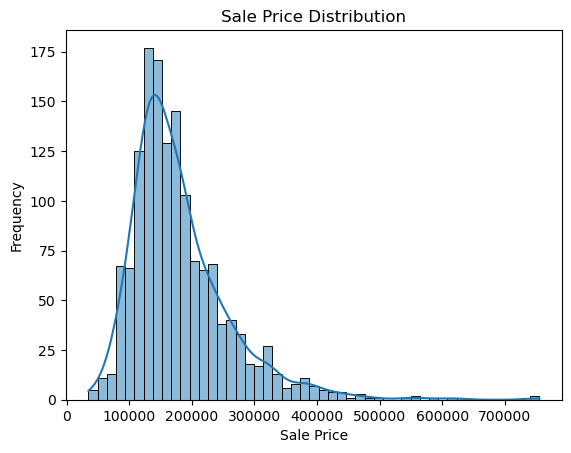

In [14]:
# Plot 1. SalePrice distribution
sns.histplot(HousePrices_train['SalePrice'], kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

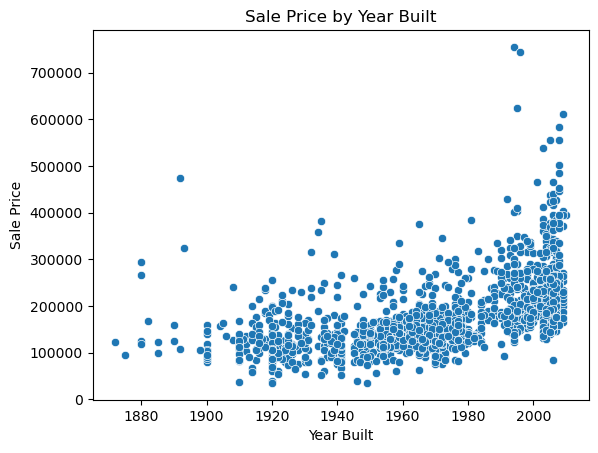

In [15]:
# Plot 2. Analyze SalePrice by YearBuilt
sns.scatterplot(x='YearBuilt', y='SalePrice', data = HousePrices_train)
plt.title("Sale Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

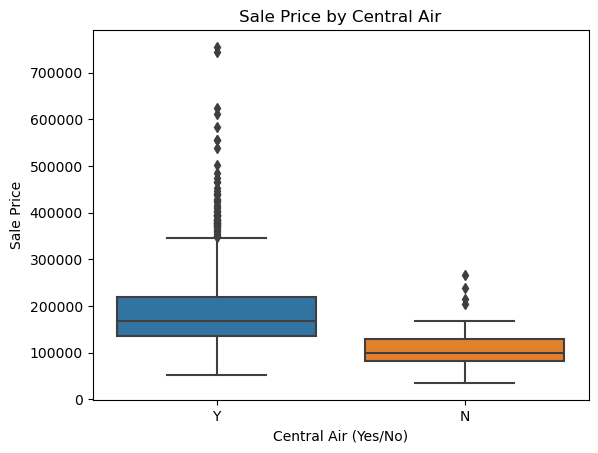

In [16]:
# Plot 3. Additional EDA: Analyzing SalePrice with respect to other features
sns.boxplot(x='CentralAir', y='SalePrice', data = HousePrices_train)
plt.title("Sale Price by Central Air")
plt.xlabel("Central Air (Yes/No)")
plt.ylabel("Sale Price")
plt.show()

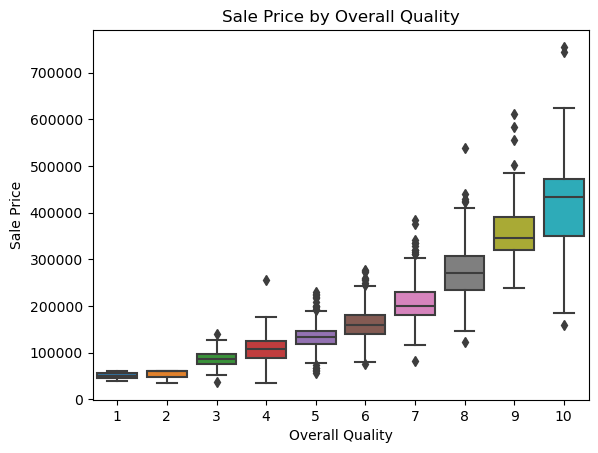

In [17]:
# Plot 4. Additional EDA: Analyzing SalePrice with respect to overall quality
sns.boxplot(x='OverallQual', y='SalePrice', data = HousePrices_train)
plt.title("Sale Price by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

### 5. Processing the dataset

In [22]:
# Select features
X = HousePrices_train[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']]
y = HousePrices_train['SalePrice']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

### 6. Modeling and Evaluation

In [23]:
# Baseline Model: Dummy Regressor
def evaluate_model(model, X_test, y_test):
    pred = model.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test, pred))
    return rmsle

dummy_reg = DummyRegressor()
dummy_reg.fit(X_train[['OverallQual']], y_train)  # Using OverallQual for the baseline model
dummy_rmsle = evaluate_model(dummy_reg, X_test[['OverallQual']], y_test)
print(f"Dummy Regressor RMSLE: {dummy_rmsle:.3f}")

Dummy Regressor RMSLE: 0.446


In [24]:
# Train the Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# Evaluate Random Forest Model
rf_rmsle = evaluate_model(random_forest_reg, X_test, y_test)
print(f"Random Forest Regressor RMSLE: {rf_rmsle:.3f}")

Random Forest Regressor RMSLE: 0.187


Interpretation of RMSLE:

1. The RMSLE metric is particularly useful when dealing with data that has a wide range of values, as it penalizes large errors more than smaller ones, especially for larger house prices in this case.
2. A lower RMSLE score, like 0.187, suggests the Random Forest Regressor has effectively learned the relationship between the features (such as OverallQual, GrLivArea, GarageCars, and YearBuilt) and the target variable (Sale Price).

### 7. Prediction (Testing the Model)

In [26]:
# Make 3 predictions on the test set
predictions = random_forest_reg.predict(X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']].iloc[:3])

# Display the predictions
for i, prediction in enumerate(predictions, 1):
    print(f"Prediction {i}: {prediction:.2f}")

Prediction 1: 142079.00
Prediction 2: 311760.45
Prediction 3: 108400.00


In [28]:
# Example 1: Select a row with specific values for the features
example_1 = HousePrices_train[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']].iloc[10]  # For row 10
example_2 = HousePrices_train[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']].iloc[50]  # For row 50
example_3 = HousePrices_train[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']].iloc[100]  # For row 100

# Prepare the examples as a DataFrame to predict
examples = pd.DataFrame([example_1, example_2, example_3])

# Use the trained model to make predictions
predictions = random_forest_reg.predict(examples)

# Display the predictions
for i, prediction in enumerate(predictions, 1):
    print(f"Prediction {i}: {prediction:.2f}")

Prediction 1: 130422.00
Prediction 2: 181479.95
Prediction 3: 202624.00


### End